# Random Graphs
**Erdos-Renyi random graph**. This graph is composed by $N$ nodes and each connection between pairs of nodes are stablished according to probability $p$. This is a typical case of a Bernoulli process.

Notice that the average degree of the generated network is not exactly as the input average degree. The input degree is the expected number of connections.

`nx.gnp_random_graph`: Returns a $G_{n,k}$ random graph, also known as an Erdős-Rényi random graph or a binomial graph.


In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import poisson
import sdeint

In [4]:
N = 100
av_degree = 8
p = av_degree/(N-1)
G = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [5]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 100
Number of edges: 389
Average degre: 7.78


/home/emma/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


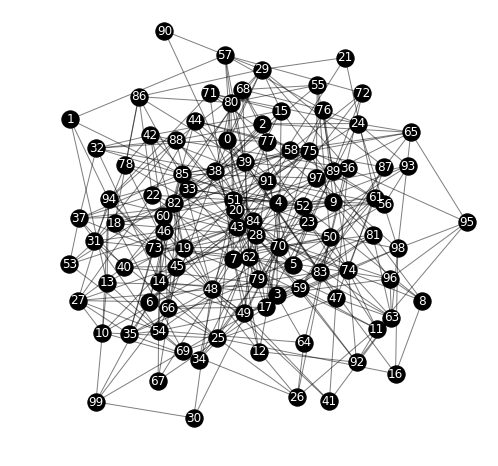

In [6]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [7]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [8]:
ks, Pk = degree_distribution(G)

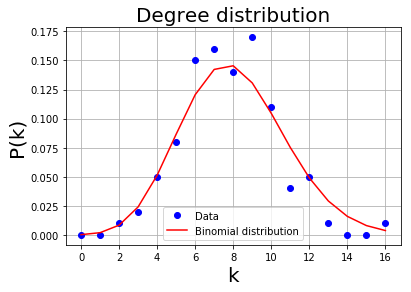

In [9]:
plt.figure()
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

### Poisson Distribution

For Poisson Distribution (previously demonstrated with binomial dist) use `scipy.stats.poisson.pmf(x, μ)`, where the probability mass function for poisson is: $$\exp(-\mu)\frac{\mu^k}{k!}$$

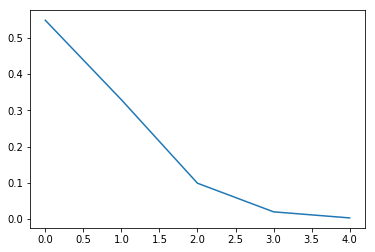

In [10]:
#example
z = 0.6
N = 1000
x = range(5)
plt.plot(x, poisson.pmf(x, z))

## Expected size of the largest two components: plot (z, expected size)

Recall from `Support_class_6.ipynb` that `sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)`, returns nodes contained in each component listed from largest to smallest

In [28]:
z = np.arange(0.1, 3, 0.1)
N=100
realisations = 20
p = z/N
S1 = np.zeros((len(p), realisations))
S2 = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        Components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        S1[index,i] = len(Components[0])
        S2[index,i] =  len(Components[1])


In [29]:
Expected_S1 = np.mean(S1, axis = 1)
Expected_S2 = np.mean(S2, axis = 1)

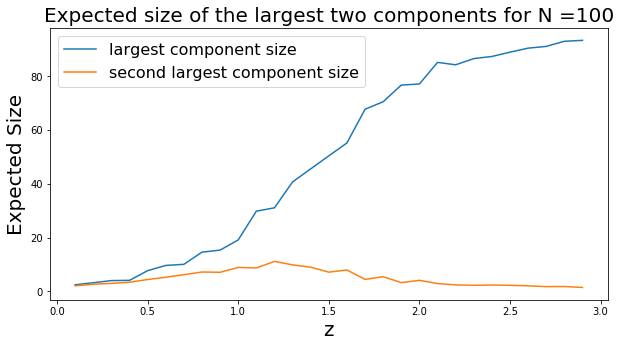

In [30]:
plt.figure(figsize = (10,5))
plt.plot(z, Expected_S1, label = "largest component size")
plt.plot(z, Expected_S2, label = "second largest component size")
plt.ylabel("Expected Size", fontsize = 20)
plt.xlabel("z", fontsize = 20)
plt.title("Expected size of the largest two components for N =100", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 16)

## Expected local clustering coefficient
The clustering coefficient of a random network is equal to $p$.

In [34]:
avc = nx.average_clustering(G)
print("Average clustering:", avc, 'and, p = ', j)

Average clustering: 0.03261111111111111 and, p =  0.029000000000000005


In [36]:
z = np.arange(0.1, 10, 0.1)
N=100
realisations = 20
p = z/N
CC = np.zeros((len(p), realisations))
for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        c=nx.average_clustering(G)
        CC[index,i] = c

In [38]:
average_CC = np.mean(CC, axis = 1)

Text(0.5,0,'z')

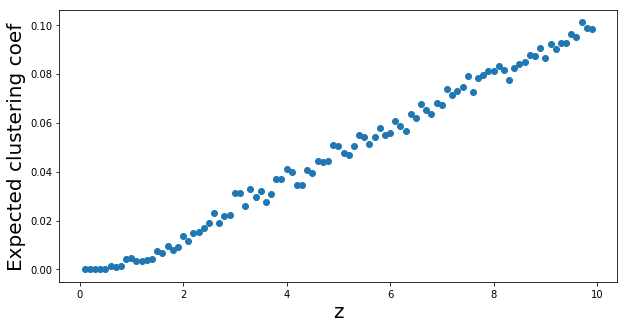

In [40]:
plt.figure(figsize = (10,5))
plt.plot(z, average_CC, "o")
plt.ylabel("Expected clustering coef", fontsize = 20)
plt.xlabel("z", fontsize = 20)

## Wigner semi-circle law
Spectrum of adjacency matrix $A$: set of eigenvalues of a matrix

Plot eigenvalue against spectral density (and compare this to wigner semi-circle law).

Use `nx.to_numpy_matrix(G)` to get the adjacency matrix (in numpy format). There exists `nx.adjacency_matrix(G)` which creates a **sparse matrix** -- better for large data sets

In [49]:
z = 10
N = 100
p = z/N
G = nx.gnp_random_graph(N,p)

In [44]:
# nx.draw(G)

In [62]:
A = nx.to_numpy_matrix(G)
evals, evecs = np.linalg.eig(A/np.sqrt(N))

In [70]:
spectral_density = stats.gaussian_kde(evals, bw_method = 0.05)
λ = np.linspace(evals.min(), evals.max(), N)

Text(0,0.5,'ρ(λ)')

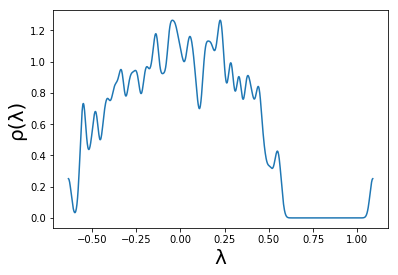

In [71]:
plt.plot(λ, spectral_density(λ))
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20)

### Wigner semi cirle
A **wigner matrix** is a real, symmetric matrix with iid entries $a_{ij}$, $\mathbb{E}(a_{ij}) =0$, var$(a_{ij}) = \sigma^2$.

**Wigner semi-circle law** - the spectral density $\rho_N$ of the matrix $\frac{A}{\sqrt{N}}$ converges with probability 1 to: $$ (2 \pi \sigma^2)^{-1} \sqrt{4 \sigma^2 - \lambda^2} \ \text{,if} \ |\lambda|<2\sigma$$

In [73]:
def semicircle(σ, μ, λ):
    winger = np.zeros(len(λ))
    for j in range(len(λ)):
        if abs(λ[j])< 2*σ:
            winger[j] = (1/(2*np.pi*σ**2))*np.sqrt(4*σ**2 - λ[j]**2)
        else:
            winger[j] = 0
    return winger

In [83]:
ee = np.linspace(-0.7, 0.7, 100000)

In [84]:
AA = A.flatten()
σ = np.std(AA)
μ = np.mean(AA)
wigner = semicircle(σ, μ, ee)

(-0.75, 0.75)

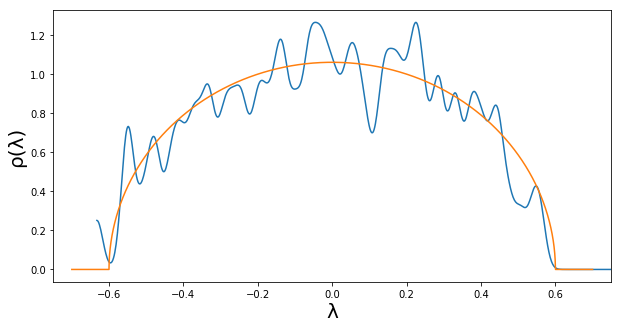

In [87]:
plt.figure(figsize = (10,5))
plt.plot(λ, spectral_density(λ))
plt.plot(ee, wigner)
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20)
plt.xlim([-0.75, 0.75])

# Geometric Brownian Motion

$X_t$ be a Brownian motion with constand drift:
    $$(Lf)(x) = \mu f'(x) + \frac{1}{2} \sigma^2 f''(x)$$

i.e. $dX_t = \mu dt + \sigma dW_t$
- $\mu \in \mathbb{R}$
- $\sigma >0$
- $X_0 = 0 $

**Geometric Brownian Motion** is defined as 
$$Y_t = e^{X_t}$$

---------------------------------------------------

In fact, if $$d X_t = (\mu - \frac{1}{2} \sigma^2)dt + \sigma dW_t$$ then, $$Y_t = exp(X_t) = Y_0 exp((\mu - \frac{1}{2} \sigma^2)t + \sigma W_t)$$ and,

$$dY_t = \mu Y_t dt + \sigma Y_t dW_t$$

In [12]:
σ_sq = 1
μ = -0.5

In [50]:
y0=1 # initial condition
α = μ - σ_sq/2

tmax=10.0 #max time (ish)

dt=0.1 # timestep

times=np.arange(0.0,tmax,dt) # vector of times
length=np.shape(times)[0]

y=np.zeros(length) # vector to store x values
y[0]=y0

x = np.zeros(length)
x[0] = 0
B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise

for i in range(0,length-1): # simulate
    y[i+1]=y[i]+μ*y[i]*dt+y[i]*σ_sq*B[i]
    x[i+1] = x[i] + α*dt + σ_sq*B[i]

In [51]:
YT = np.zeros(length)
for i in range(length-1):
    YT[i] = np.exp(α*times[i] + σ_sq*B[i])

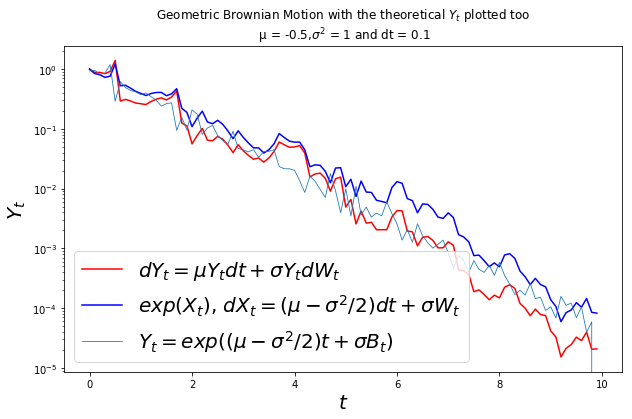

In [70]:
plt.figure(figsize=(10,6))
plt.plot(times,y,'r', label=r"$dY_t = \mu Y_tdt+\sigma Y_t dW_t$")
plt.plot(times,np.exp(x),'b', label=r'$exp(X_t)$, '+
         r'$dX_t = (\mu- \sigma^2/2)dt+\sigma W_t$')

plt.xlabel('$t$',fontsize=20)
plt.ylabel('$Y_t$',fontsize=20)
#plt.ylim(0.8, 1.4)
plt.title('Geometric Brownian Motion with the theoretical $Y_t$ plotted too'+ 
          '\n μ = {},$σ^2$ = {} and dt = 0.1 '.format(μ, σ_sq))
plt.plot(times, YT, lw=0.8, label = "$Y_t = exp((μ-σ^2/2)t +σ B_t)$")
plt.legend(loc="lower left",fontsize=20)
plt.yscale("log")

In [57]:

def fX(x, t):
    return (μ-0.5*σ_sq)

def gX(x, t):
    return σ_sq


def fY(y, t):
    return μ*y

def gY(y, t):
    return σ_sq*y

Xt = sdeint.itoint(fX, gX, 0, times)
Yt = sdeint.itoint(fY, gY, 1, times)

Text(0, 0.5, '$Y_t$')

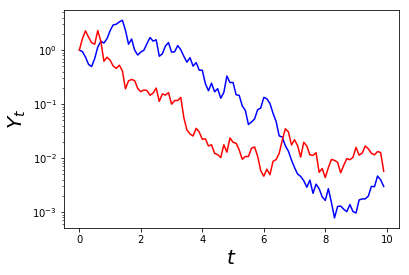

In [71]:
plt.plot(times,np.exp(Xt),'b')
plt.plot(times,Yt,'r')
plt.yscale("log")
plt.xlabel('$t$',fontsize=20)
plt.ylabel('$Y_t$',fontsize=20)